In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow import keras

from basic_nlp_model import Model, experiment

In [3]:
df = pd.read_csv('../ensambles baseline/data/tex_physics.csv')

In [4]:
def class_decider(row):
    if row['score'] < 2.:
        return 0
    elif row['score'] > 2.:
        return 1
    else:
        if row['n_answers'] < 1.:
            return 0
        else:
            return 1

In [5]:
df.loc[:, 'y'] = df.apply(class_decider, axis=1)

In [6]:
df['y'].value_counts()

0    186511
1    184785
Name: y, dtype: int64

In [7]:
data = df[['title', 'n_lists', 'n_links', 'n_tags',
       'num_question_marks', 'wh_word_count', 'sentence_count', 'word_count',
       'example_count', 'n_linebreaks', 'title_word_count',
       'title_question_marks', 'y']]

In [8]:
train_data, val_data = train_test_split(data, test_size=0.3, stratify=data['y'], random_state=42)

In [9]:
train_data

,title,n_lists,n_links,n_tags,num_question_marks,wh_word_count,sentence_count,word_count,example_count,n_linebreaks,title_word_count,title_question_marks,y
292249,How do I install pgfpages package?,0,0,3,2,0,3,27,0,1,6,1,0
178165,AUCTeX can't find PDFLaTeX,0,0,2,1,3,6,90,0,7,5,0,1
223579,Loading microtype before or after the font,0,4,1,1,3,5,174,0,20,7,0,1
266094,Render stl files in asymptote,0,5,2,0,1,5,80,0,4,5,0,1
44330,How bright is a 150 W incandescent light bulb?,0,0,1,1,2,6,86,0,3,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344381,"\usepackage{tikz} causing ""extra }"" and ""missi...",0,0,3,0,4,30,453,0,128,7,0,0
341925,Indenting all lines in a theorem environment,0,2,1,2,1,5,108,0,34,7,0,0
71506,Why is the standard deviation the error on the...,1,0,4,1,7,7,290,0,19,11,1,0
130699,When does magnetic force act as a centripetal ...,0,0,2,4,3,4,49,0,2,14,1,0


In [50]:
specs = {
    'data_path': '../ensambles baseline/data/tex_physics.csv',
    'train_data': train_data,
    'val_data': val_data,
    'max_tokens': 25000,
    'sequence_length': 20,
    'embedding_dimension': 100,
    'lstm_layers': [16, 16, 32],
    'lstm_activation': 'tanh',
    'lstm_reg': [0.0002, 0.00035, 0.00035],
    'lstm_dropout': [0.3, 0.3, 0.3],
    'dense_layers': [32, 32, 32],
    'dense_activation': 'elu',
    'dense_reg': [0.0002, 0.00035, 0.00035],
    'dense_dropout': [0.3, 0.3, 0.3],
    'optimizer': "keras.optimizers.Adam(0.001)",
    'callbacks': "[keras.callbacks.LearningRateScheduler(lambda ep, lr: lr*0.8)]",
    'batch_size': 1024,
    'epochs': 10
}

In [51]:
model, results = experiment('./registry.json', specs)

Epoch 1/10
254/254 [==============================] - 37s 147ms/step - loss: 0.7367 - accuracy: 0.5422 - val_loss: 0.6758 - val_accuracy: 0.5534
Epoch 2/10
254/254 [==============================] - 44s 172ms/step - loss: 0.6579 - accuracy: 0.6086 - val_loss: 0.6629 - val_accuracy: 0.6021
Epoch 3/10
254/254 [==============================] - 46s 183ms/step - loss: 0.6415 - accuracy: 0.6288 - val_loss: 0.6645 - val_accuracy: 0.5910
Epoch 4/10
254/254 [==============================] - 46s 182ms/step - loss: 0.6325 - accuracy: 0.6391 - val_loss: 0.6644 - val_accuracy: 0.5999
Epoch 5/10
254/254 [==============================] - 47s 183ms/step - loss: 0.6249 - accuracy: 0.6477 - val_loss: 0.6715 - val_accuracy: 0.6047
Epoch 6/10
254/254 [==============================] - 47s 183ms/step - loss: 0.6184 - accuracy: 0.6538 - val_loss: 0.6722 - val_accuracy: 0.6045
Epoch 7/10
254/254 [==============================] - 46s 182ms/step - loss: 0.6140 - accuracy: 0.6579 - val_loss: 0.6754 - val_ac

In [52]:
results

{'data_path': '../ensambles baseline/data/tex_physics.csv',
 'max_tokens': 25000,
 'sequence_length': 20,
 'embedding_dimension': 100,
 'lstm_layers': [16, 16, 32],
 'lstm_activation': 'tanh',
 'lstm_reg': [0.00015, 0.00025, 0.00025],
 'lstm_dropout': [0.3, 0.3, 0.3],
 'dense_layers': [32, 32, 32],
 'dense_activation': 'elu',
 'dense_reg': [0.00015, 0.00025, 0.00025],
 'dense_dropout': [0.3, 0.3, 0.3],
 'optimizer': 'keras.optimizers.Adam(0.001)',
 'callbacks': '[keras.callbacks.LearningRateScheduler(lambda ep, lr: lr*0.8)]',
 'batch_size': 1024,
 'epochs': 10,
 'val_accuracy': 0.5984432697296143}

In [53]:
model.predict([val_data.iloc[:3, 0].to_numpy(), val_data.iloc[:3, 1:-1].to_numpy()])

array([[0.21814604],
       [0.68046534],
       [0.6269357 ]], dtype=float32)

In [54]:
val_data.iloc[:3, -1]

363092    0
234864    0
227402    1
Name: y, dtype: int64

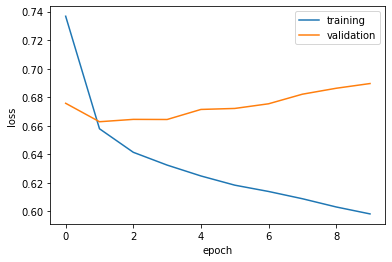

In [55]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'])

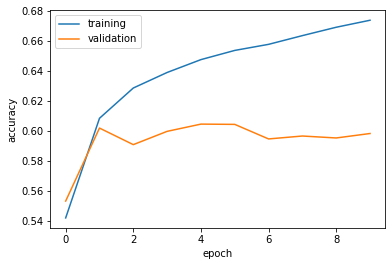

In [56]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])

In [57]:
tokenizer = model.tokenizer
normalizer = model.normalizer

In [86]:
specs = {
    'data_path': '../ensambles baseline/data/tex_physics.csv',
    'train_data': train_data,
    'val_data': val_data,
    'max_tokens': 25000,
    'sequence_length': 20,
    'embedding_dimension': 100,
    'lstm_layers': [16, 16, 32],
    'lstm_activation': 'tanh',
    'lstm_reg': [0.0003, 0.00035, 0.00035],
    #'lstm_dropout': [0.3, 0.3, 0.3],
    'dense_layers': [32, 32, 32],
    'dense_activation': 'elu',
    'dense_reg': [0.0003, 0.00035, 0.00035],
    #'dense_dropout': [0.3, 0.3, 0.3],
    'optimizer': "keras.optimizers.Adam(0.001)",
    'callbacks': "[keras.callbacks.LearningRateScheduler(lambda ep, lr: lr*0.8)]",
    'batch_size': 1024,
    'epochs': 10
}

In [87]:
model, results = experiment('./registry.json', specs, tokenizer, normalizer)

Epoch 1/10
254/254 [==============================] - 126s 495ms/step - loss: 0.7651 - accuracy: 0.5169 - val_loss: 0.7104 - val_accuracy: 0.5037
Epoch 2/10
254/254 [==============================] - 119s 470ms/step - loss: 0.6761 - accuracy: 0.5785 - val_loss: 0.6649 - val_accuracy: 0.5868
Epoch 3/10
254/254 [==============================] - 120s 471ms/step - loss: 0.6510 - accuracy: 0.6207 - val_loss: 0.6663 - val_accuracy: 0.6110
Epoch 4/10
254/254 [==============================] - 119s 468ms/step - loss: 0.6386 - accuracy: 0.6372 - val_loss: 0.6691 - val_accuracy: 0.6150
Epoch 5/10
254/254 [==============================] - 118s 463ms/step - loss: 0.6305 - accuracy: 0.6478 - val_loss: 0.6809 - val_accuracy: 0.5771
Epoch 6/10
254/254 [==============================] - 118s 466ms/step - loss: 0.6243 - accuracy: 0.6539 - val_loss: 0.6779 - val_accuracy: 0.6006
Epoch 7/10
254/254 [==============================] - 120s 474ms/step - loss: 0.6192 - accuracy: 0.6601 - val_loss: 0.6755 -

In [88]:
results

{'data_path': '../ensambles baseline/data/tex_physics.csv',
 'max_tokens': 25000,
 'sequence_length': 20,
 'embedding_dimension': 100,
 'lstm_layers': [16, 16, 32],
 'lstm_activation': 'tanh',
 'lstm_reg': [0.0003, 0.00035, 0.00035],
 'dense_layers': [32, 32, 32],
 'dense_activation': 'elu',
 'dense_reg': [0.0003, 0.00035, 0.00035],
 'optimizer': 'keras.optimizers.Adam(0.001)',
 'callbacks': '[keras.callbacks.LearningRateScheduler(lambda ep, lr: lr*0.8)]',
 'batch_size': 1024,
 'epochs': 10,
 'val_accuracy': 0.6024742126464844}

In [89]:
model.predict([val_data.iloc[:3, 0].to_numpy(), val_data.iloc[:3, 1:-1].to_numpy()])

array([[0.18498722],
       [0.68230206],
       [0.6046291 ]], dtype=float32)

In [90]:
val_data.iloc[:3, -1]

363092    0
234864    0
227402    1
Name: y, dtype: int64

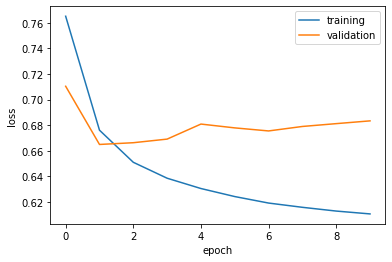

In [91]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'])

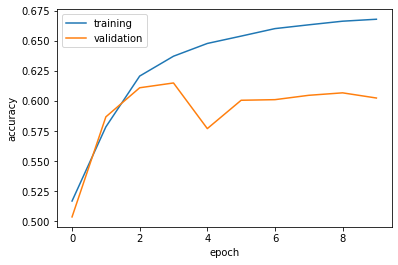

In [92]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])